# 实训2　分析$1996\sim2015$年人口数据各个特征的分布与分散情况

## 实训任务及要求

1. 训练要点
    1. 掌握直方图绘制。
    2. 掌握饼图绘制。
    3. 掌握箱线图绘制。


2. 需求说明

    &emsp;&emsp;通过绘制各年份男女人口数目及城乡人口数目的直方图，男女人口比例及城乡人口比例的饼图可以发现人口结构的变化。而绘制每个特征的箱线图则可以发现不同特征增长或者减少的速率是否变得缓慢。


3. 实现步骤
    1. 创建3幅画布并添加对应数目的子图。
    2. 在每一幅子图上绘制对应的图形。
    3. 保存和显示图形。
    4. 根据图形，分析我国人口结构变化情况以及变化速率的增减情况。

## 实训源代码

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.sans-serif'] = "Microsoft YaHei"
pyplot.rcParams['axes.unicode_minus'] = False

In [2]:
data = numpy.load('data/Training.npz', allow_pickle=True)
name = data['feature_names']
data = data['data']
data[:-2] = data[-3::-1]

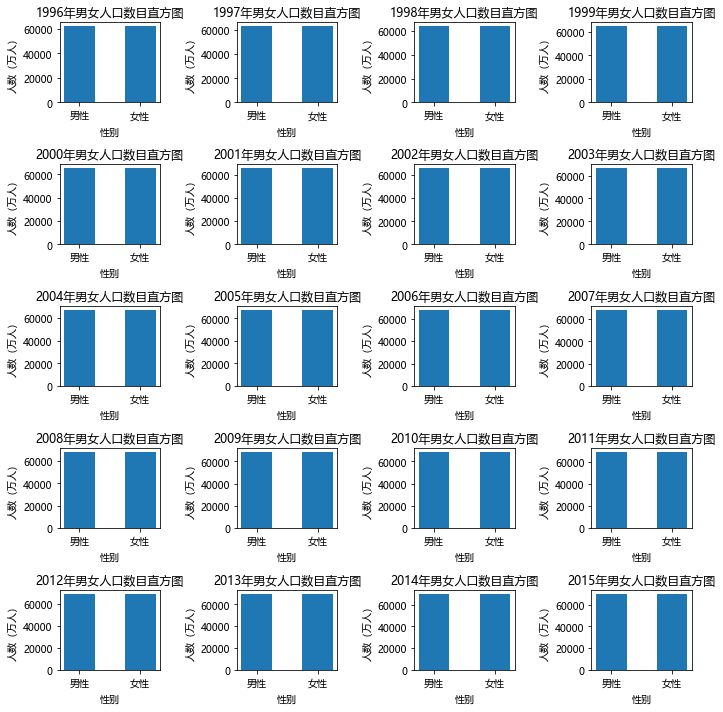

In [9]:
# 第1幅画布
figure_A = pyplot.figure(figsize=(10, 10))
# 迭代绘制子图
for plot_ID in range(20):
    figure_A.add_subplot(5, 4, plot_ID + 1)
    pyplot.bar(['男性', '女性'], data[plot_ID, 2:3], width=0.5)
    pyplot.xlabel('性别')
    pyplot.ylabel('人数（万人）')
    pyplot.title(data[plot_ID, 0] + '男女人口数目直方图')
# 保存并展示
figure_A.tight_layout()
pyplot.savefig('figures/T3-2-1.svg')
pyplot.show()

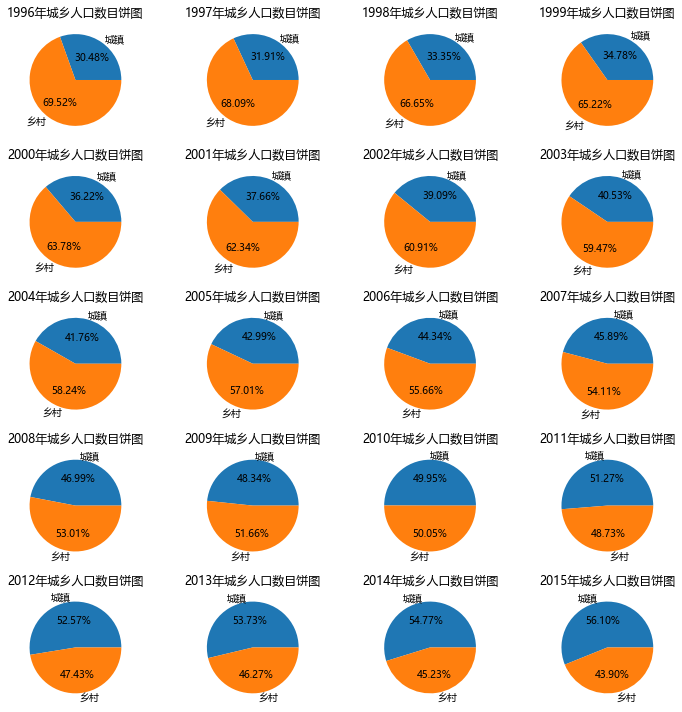

In [12]:
# 第2幅画布
figure_B = pyplot.figure(figsize=(10, 10))
# 迭代绘制子图
for plot_ID in range(20):
    figure_B.add_subplot(5, 4, plot_ID + 1)
    pyplot.pie(data[plot_ID, -2:], autopct='%1.2f%%', labels=['城镇', '乡村'])
    pyplot.title(data[plot_ID, 0] + '城乡人口数目饼图')
# 保存并展示
figure_B.tight_layout()
pyplot.savefig('figures/T3-2-2.svg')
pyplot.show()

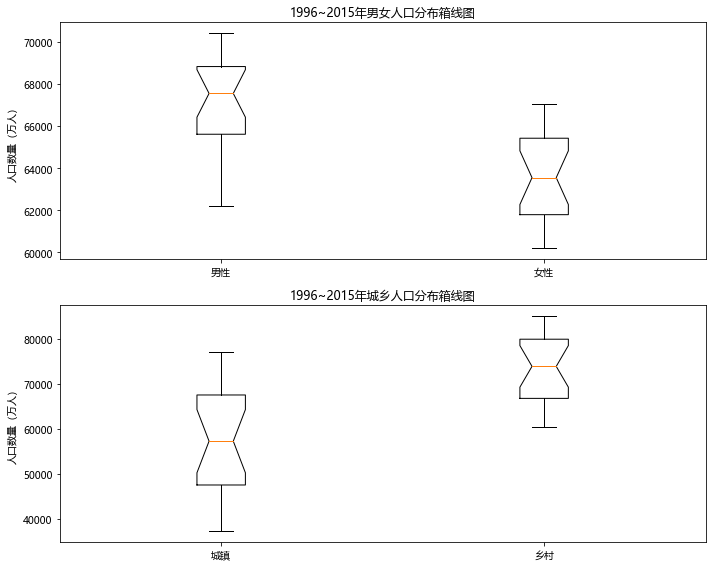

In [13]:
# 第3幅画布
figure_C = pyplot.figure(figsize=(10, 8))
# 子图A
figure_C.add_subplot(2, 1, 1)
boxes = [data[:-2, column] for column in (2, 3)]
labels = ['男性', '女性']
pyplot.boxplot(boxes, notch=True, labels=labels, meanline=True)
pyplot.ylabel('人口数量（万人）')
pyplot.title('1996~2015年男女人口分布箱线图')
# 子图B
figure_C.add_subplot(2, 1, 2)
boxes = [data[:-2, column] for column in (4, 5)]
labels = ['城镇', '乡村']
pyplot.boxplot(boxes, notch=True, labels=labels, meanline=True)
pyplot.ylabel('人口数量（万人）')
pyplot.title('1996~2015年城乡人口分布箱线图')
# 绘图
figure_C.tight_layout()
pyplot.savefig('figures/T3-2-3.svg')
pyplot.show()